In [4]:
##Regression Model: Income vs. Tobacco & Alcohol Expenditure##

import pandas as pd
import numpy as np

file_path = "/home/jeumma/econometrics_analysis/Family Income and Expenditure.csv"
df = pd.read_csv(file_path)

df_selected = df[['Total Household Income', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure']].copy()

# Create a new column for total alcohol + tobacco expenditure
df_selected['Total Tobacco & Alcohol Expenditure'] = (
    df_selected['Alcoholic Beverages Expenditure'] + df_selected['Tobacco Expenditure']
)

#Ensure numeric data (remove NaN if any)
df_selected = df_selected[['Total Household Income','Total Tobacco & Alcohol Expenditure']].dropna()


# Sort data by income for better visualization
df_selected = df_selected.sort_values(by='Total Household Income')


print(df_selected)


       Total Household Income  Total Tobacco & Alcohol Expenditure
9474                    11285                                  387
22638                   11988                                    0
31209                   12039                                    0
6356                    12141                                    0
10200                   12911                                  308
...                       ...                                  ...
39302                 6452314                                 7988
9382                  7082152                                    0
30865                 9952913                                 5670
1238                 11639365                                 3160
2139                 11815988                                    0

[41544 rows x 2 columns]


                                     OLS Regression Results                                    
Dep. Variable:     Total Tobacco & Alcohol Expenditure   R-squared:                       0.015
Model:                                             OLS   Adj. R-squared:                  0.015
Method:                                  Least Squares   F-statistic:                     620.9
Date:                                 Sun, 16 Mar 2025   Prob (F-statistic):          4.85e-136
Time:                                         10:00:37   Log-Likelihood:            -4.1263e+05
No. Observations:                                41544   AIC:                         8.253e+05
Df Residuals:                                    41542   BIC:                         8.253e+05
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                             coef    std

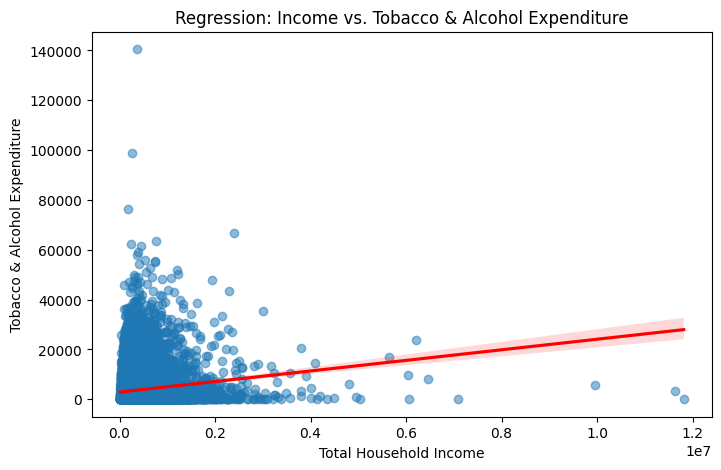

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Define X (independent variable) and y (dependent variable)

X = df_selected['Total Household Income']
y = df_selected['Total Tobacco & Alcohol Expenditure']

#Add a constant term for the intercept in regression
X = sm.add_constant(X)

#Fit the regressioin model
model = sm.OLS(y, X).fit()

print(model.summary())

#R² (coefficient of determination) → How much variance in expenditure is explained by income.
#P-value for Income → If it's statistically significant (<0.05), income has a real effect.
#Coefficient for Income → The change in expenditure for every $1 increase in income.

#the weak correlation (~0.12):
    #A low R² (meaning income doesn't explain much variance).
    #A small coefficient (suggesting a weak relationship).

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=df_selected['Total Household Income'], y=df_selected['Total Tobacco & Alcohol Expenditure'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Regression: Income vs. Tobacco & Alcohol Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Tobacco & Alcohol Expenditure")
plt.show()
